## Machine Learning and Vision for Waste Management System – Vision RO

## Data Description

**Roll off trucks are used to dump waste bins. The process of determining a complete roll off is being done by human intervention causing many irregularities.To overcome these problems,Rear cameras has been incorporated on the back of the truck to capture the images and a machine learning model is being developed using suitable algorithms and machine vision tools to detect the position of truck.

The dataset taken for this project consists of images captured from the roll off trucks. The dataset images is classified in to three categeories as Pickup data (Loading the Bin),Dump data ( unloading the bin ), Dropoff data( Bin completely out from truck)  based on the bin position. The dataset has a total of 969 images distributed over five events for each categeory. The given data is labelled.



In [144]:
import os
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize
import matplotlib.pyplot as plt
from pathlib import Path

In [129]:
#!pip install hvplot
import hvplot.pandas

In [130]:
#pip install tensorflow

In [131]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, smart_resize

In [132]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [133]:
os.listdir()

['.config', 'drive', 'sample_data']

In [140]:
p = Path().cwd()
print(p)
q =  p/'drive'/'MyDrive'/'Data Sets' # use p to create a path to the data 
print(q)

/content
/content/drive/MyDrive/Data Sets


 **The plot represents the number of images present in the raw data.Dump data has more number of images comparing to the other two categories

Displaying the number of instances in the Input categories provided :
RO Dump Data Set
5
RO Pickup Data Set
5
RO Drop Off Data Set
5


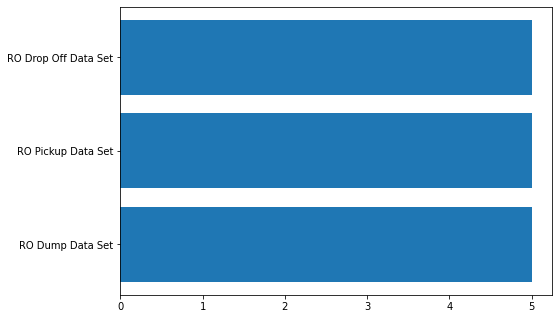

In [153]:
sum=0
file_name =[]
files_inside=[]
print('Displaying the number of instances in the Input categories provided :')
for fldr in q.iterdir(): 
  if(sum>0):
    print(sum)
    files_inside.append(sum)
  sum=0
  print(fldr.name)
  file_name.append(fldr.name)
  current_label = fldr.name
  for img in fldr.iterdir():
    sum=sum+1
print(sum)
files_inside.append(sum)
#print(file_name,files_inside)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = files_inside
x = file_name
ax.barh(x,y)
plt.show()

In [151]:
count = 0
folder_counts = 0
folder_name=[]
folder_count=[]
for fldr in q.iterdir(): 
  print('\n \nExploring the folder :',fldr.name)
  current_label = fldr.name
  folder_counts = 0
  for img in fldr.iterdir():
    folder_counts = folder_counts +count
    print('Counting Images in folder :',img.name)
    folder_name.append(img.name)
    count = 0
    for img2 in img.iterdir():
      count= count+1
    print(count)
    folder_count.append(count)
  print('Total number of images in folder :',fldr.name,'is',folder_counts)
  new=fldr.name+' Total'
  folder_name.append(new)
  folder_count.append(folder_counts)

print(folder_name, folder_count)


 
Exploring the folder : RO Dump Data Set
Counting Images in folder : 46773 RO 20 TruckDumped
146
Counting Images in folder : 50194 RO 20 TruckDumped
113
Counting Images in folder : 50488 RO 20 TruckDumped
61
Counting Images in folder : 47640 RO 20 TruckDumped
125
Counting Images in folder : 45750 RO 20 TruckDumped
80
Total number of images in folder : RO Dump Data Set is 445

 
Exploring the folder : RO Pickup Data Set
Counting Images in folder : 49964 RO 20 TruckPickedUpBin
17
Counting Images in folder : 51284 RO 20 TruckPickedUpBin
13
Counting Images in folder : 50461 RO 20 TruckPickedUpBin
66
Counting Images in folder : 45879 RO 20 TruckPickedUpBin
30
Counting Images in folder : 45695 RO 20 TruckPickedUpBin
144
Total number of images in folder : RO Pickup Data Set is 206

 
Exploring the folder : RO Drop Off Data Set
Counting Images in folder : 47622 RO 20 TruckDroppedOffBin
70
Counting Images in folder : 48981 RO 20 TruckDroppedOffBin
8
Counting Images in folder : 48165 RO 20 Tru

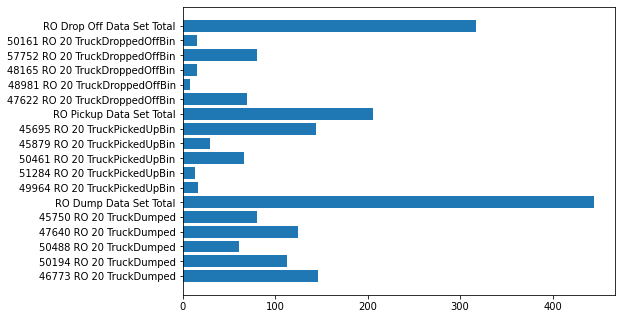

In [152]:
import matplotlib.pyplot as plt
import numpy as np


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = folder_count
x = folder_name
ax.barh(x,y)
plt.show()

Here we  can see that the data has been divided into 3 Buckets,

* Pickup
* DropOff
* Dump

Each folder has 5 incidents inside them, some are longer than others hence the difference in number of images in each folder.

Now we classify this data into 4 distinct Categories,

* Loaded
* Unloaded
* Dumping
* Trans

when we see an image of a truck loading or unloading the images look similar, so we have categorized them as "Trans".


**After classification we are taking a look at the images inside each folder**

/content
/content/drive/MyDrive/Colab Notebooks/waste
Loaded
421
Unloaded
104
Inter
231
Dump
171
['Loaded', 'Unloaded', 'Inter', 'Dump'] [421, 104, 231, 171]


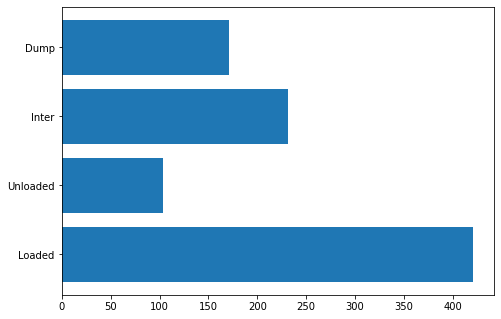

In [138]:
p = Path().cwd()
print(p)
q =  p/'drive'/'MyDrive'/'Colab Notebooks'/'waste' # use p to create a path to the data 
print(q)
folder_name=[]
folder_count=[]

sum=0
for fldr in q.iterdir():
  if(sum>0): 
    print(sum)
    folder_count.append(sum)
  sum=0
  print(fldr.name)
  folder_name.append(fldr.name)
  current_label = fldr.name
  for img in fldr.iterdir():
    #img = load_img(img)
    #print(img.size)
    sum=sum+1
print(sum)
folder_count.append(sum)

print(folder_name,folder_count)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = folder_count
x = folder_name
ax.barh(x,y)
plt.show()

Some classifications have more data then others, we ideally need same amount in each classification to ensure bias is not introduced

**Now we take a look at the image resolution and see the distribution**

/content
/content/drive/MyDrive/Colab Notebooks/waste
['(1024, 576)', '(320, 180)'] [568, 359]


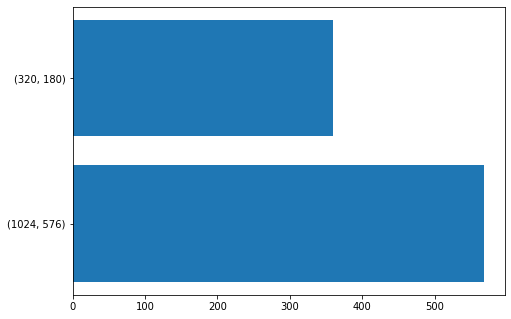

In [139]:
p = Path().cwd()
print(p)
q =  p/'drive'/'MyDrive'/'Colab Notebooks'/'waste' # use p to create a path to the data 
print(q)
folder_name=[]
folder_count=[]
ncount = 0
sum=0
for fldr in q.iterdir():
  sum=0
  for img in fldr.iterdir():
    img = load_img(img)
    #print(img.size)
    sum=sum+1
    if(str(img.size) not in folder_name):
      folder_name.append(str(img.size))
      folder_count.append(0)
    ncount=0
    for i,j in zip(folder_name,folder_count):
      #print('inside for',i,j)
      if(i==str(img.size)):
        folder_count[ncount] = folder_count[ncount]+1
        #print('inside for if',i,j)
        #print(folder_name,folder_count)
      ncount = ncount+1
        

print(folder_name,folder_count)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y = folder_count
x = folder_name
ax.barh(x,y)
plt.show()

There are 2 types of image quality,

* 1024x576
* 320x180

We will need to convert them all into one resolution so that they can be feed into the model.